<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/bmwmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/BMW_Car_Sales_Classification (1).csv")

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


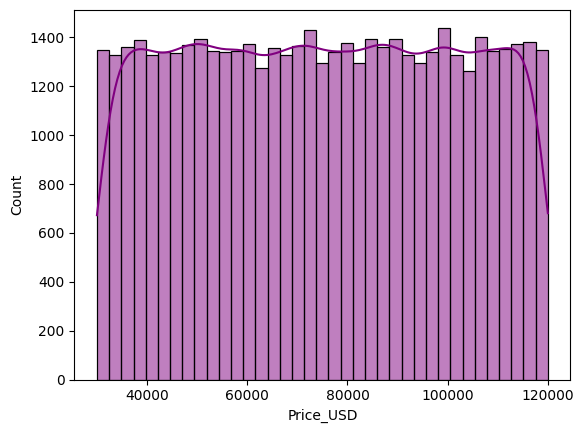

In [7]:
sns.histplot(data=df, x="Price_USD", kde= True, color="purple")
plt.show()

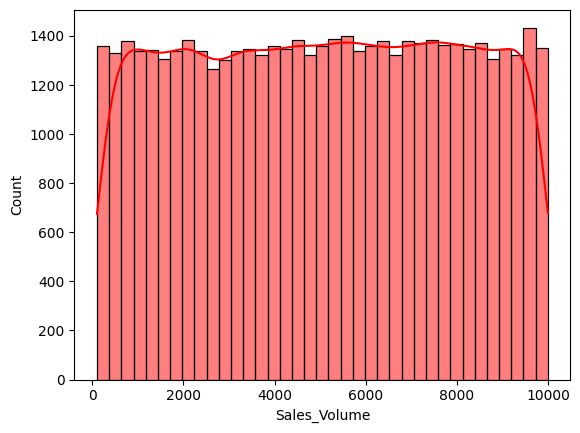

In [8]:
sns.histplot(data=df, x="Sales_Volume", kde= True, color="red")
plt.show()

In [9]:
df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


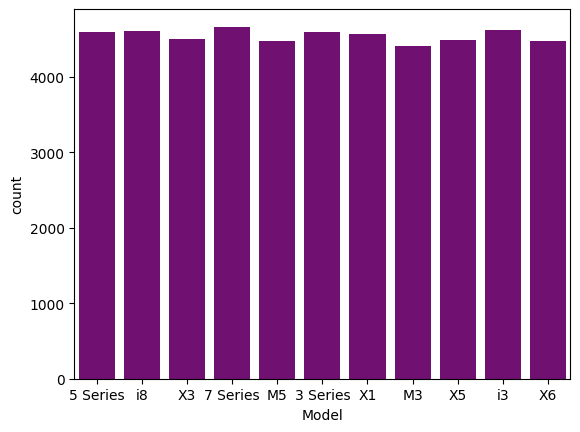

In [11]:
sns.countplot(data=df, x="Model", color="purple")
plt.show()

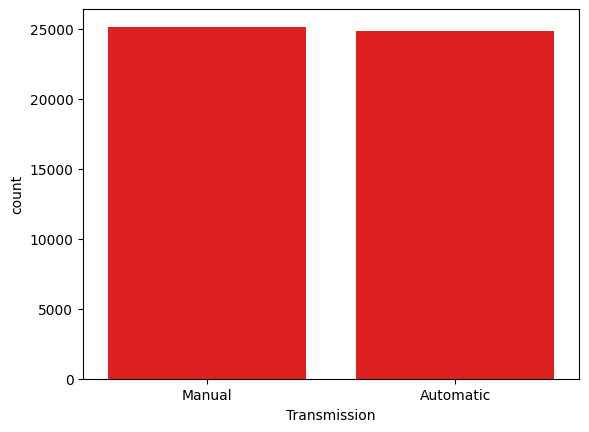

In [12]:
sns.countplot(data=df, x="Transmission", color="red")
plt.show()

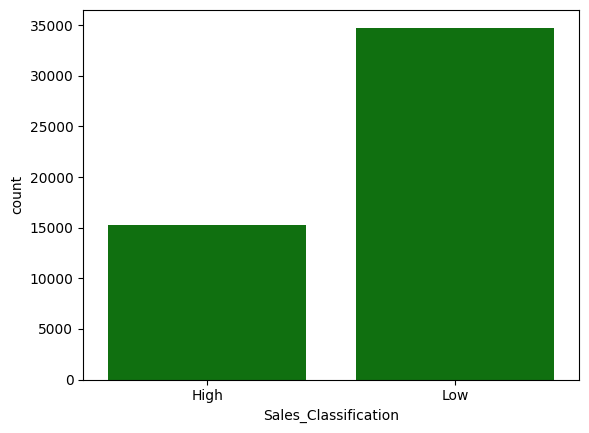

In [13]:
sns.countplot(data= df, x="Sales_Classification", color="green")
plt.show()

In [14]:
df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


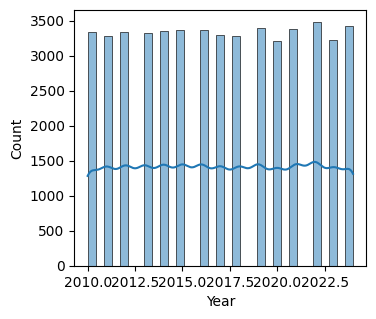

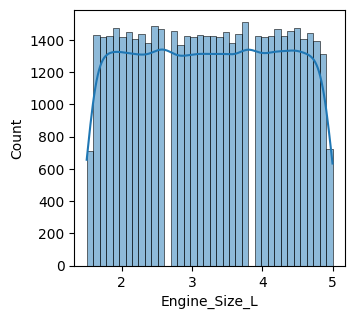

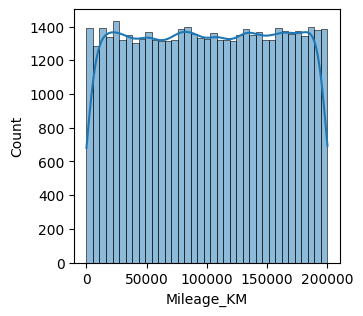

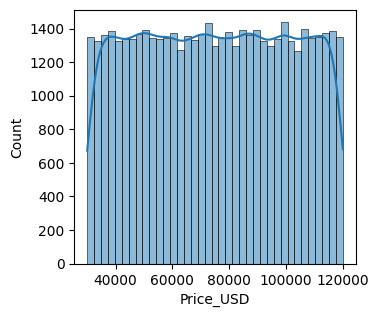

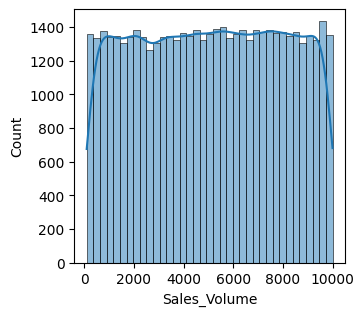

In [16]:
num_cols= df.select_dtypes(include=['int64','float64']).columns
for i, col in enumerate(num_cols):
  plt.figure(figsize=(10,6))
  plt.subplot(2,3, i+1)
  sns.histplot(data=df, x=col, kde=True)
  plt.tight_layout()
  plt.show()

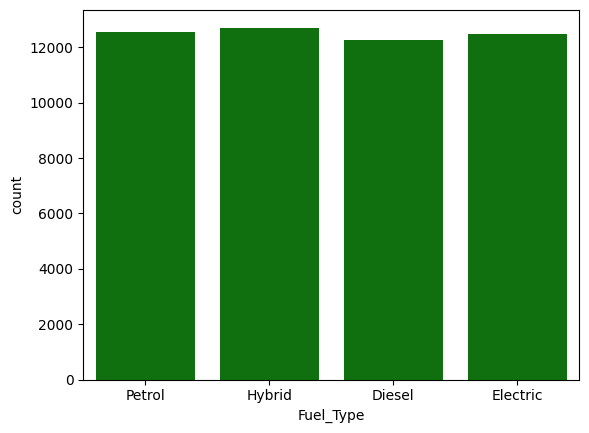

In [17]:
sns.countplot(data=df, x="Fuel_Type", color="green")
plt.show()

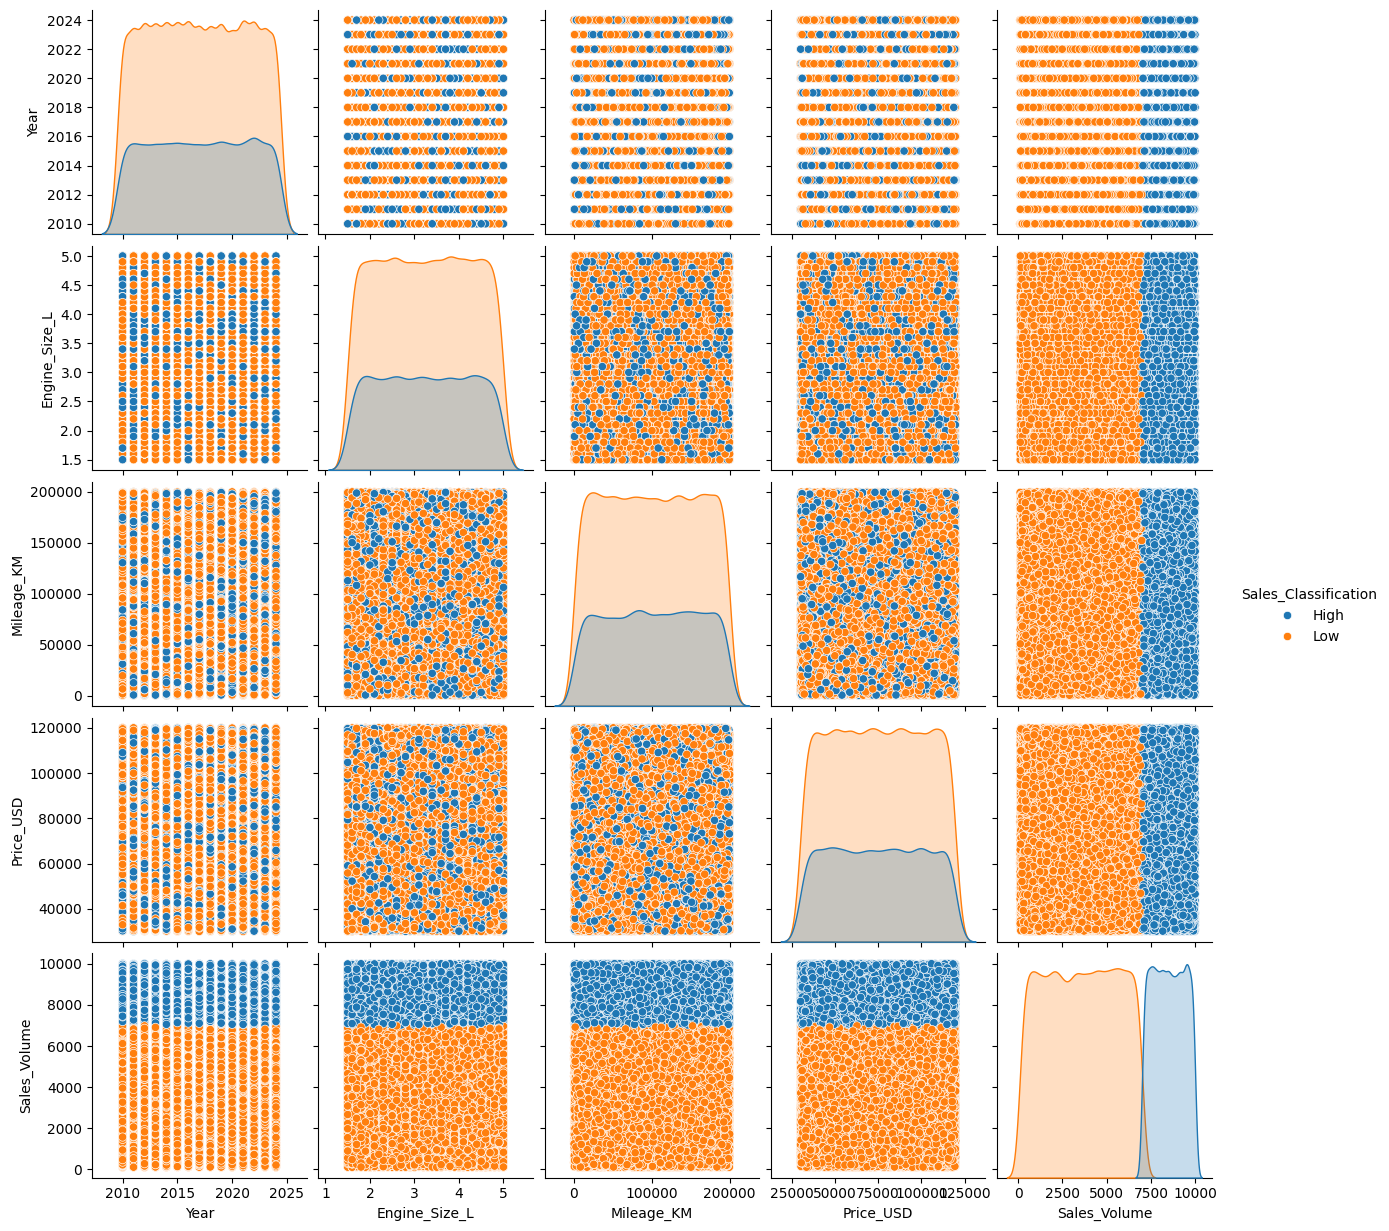

In [18]:
sns.pairplot(data=df, hue= "Sales_Classification")
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
cat_col= df.select_dtypes(include=['object']).columns


In [28]:
le= LabelEncoder()
for col in cat_col:
  df[col]= le.fit_transform(df[col])


In [29]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1


In [30]:
X= df.drop("Sales_Classification", axis=1)
y= df["Sales_Classification"]

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression 0.999               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


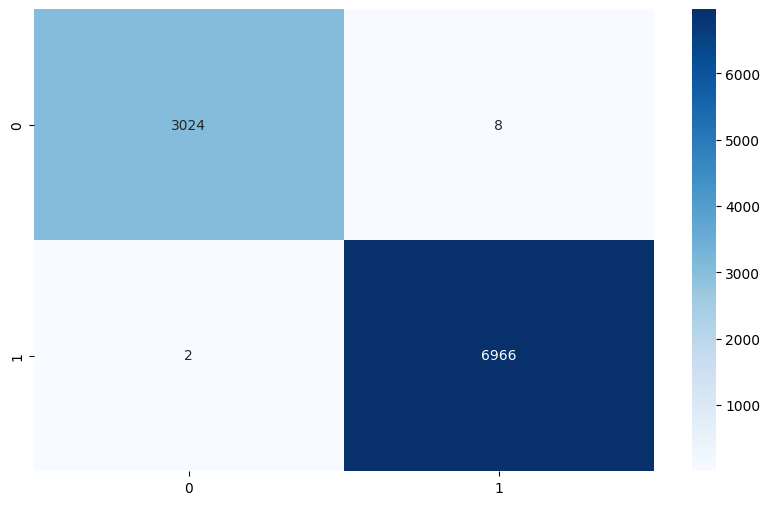

K-Nearest Neighbour 0.9577               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3032
           1       0.97      0.97      0.97      6968

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000



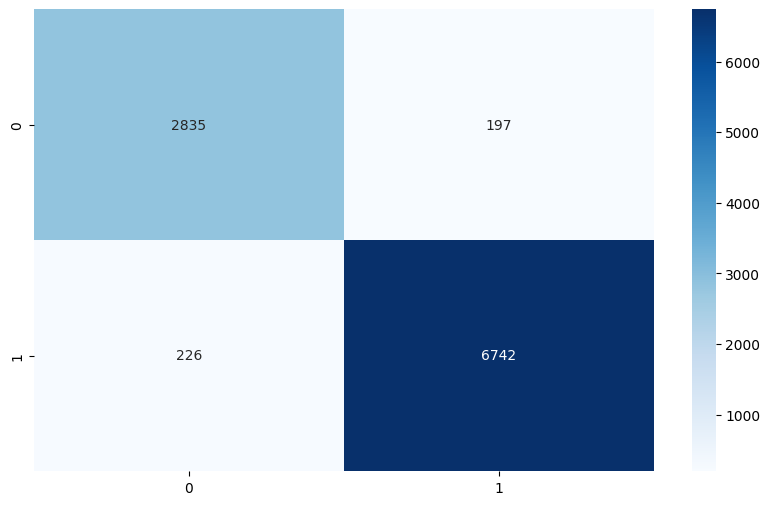

Decision Tree 1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



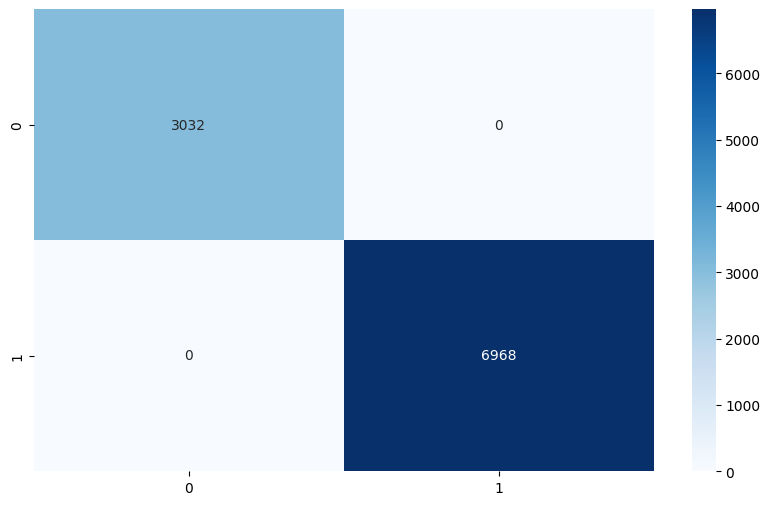

Random Forest 1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



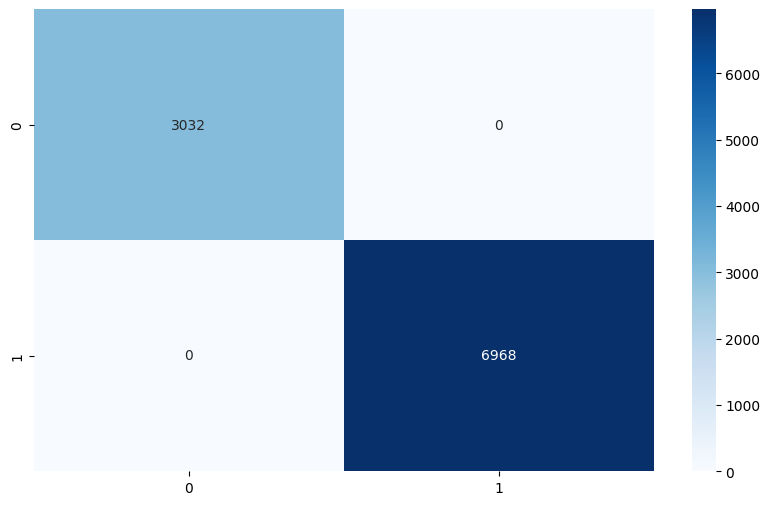

Support Vector Classifier 0.9958               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



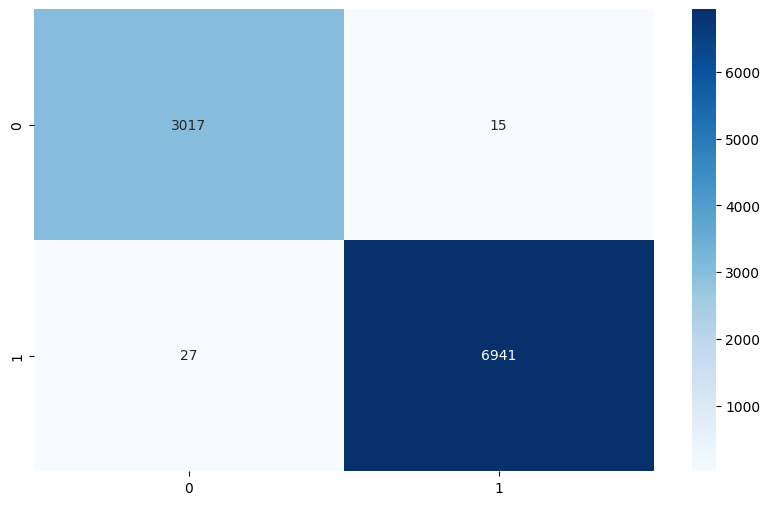

Naive Bayes 0.9996               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



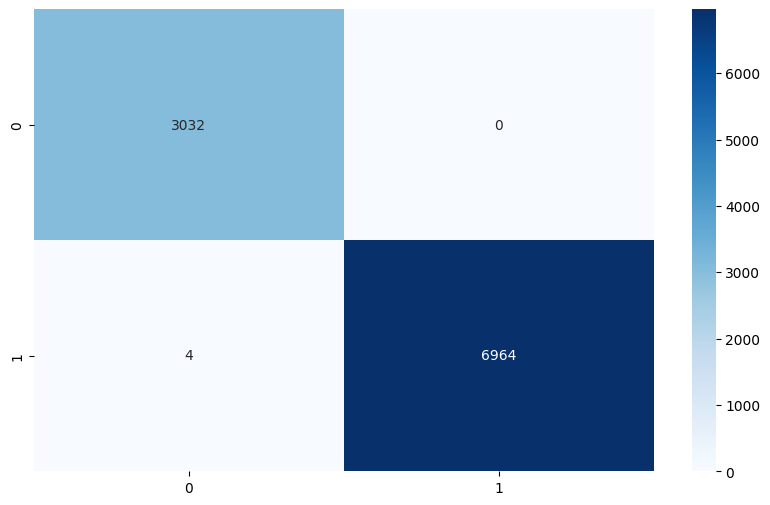

Gradient Boosting 1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



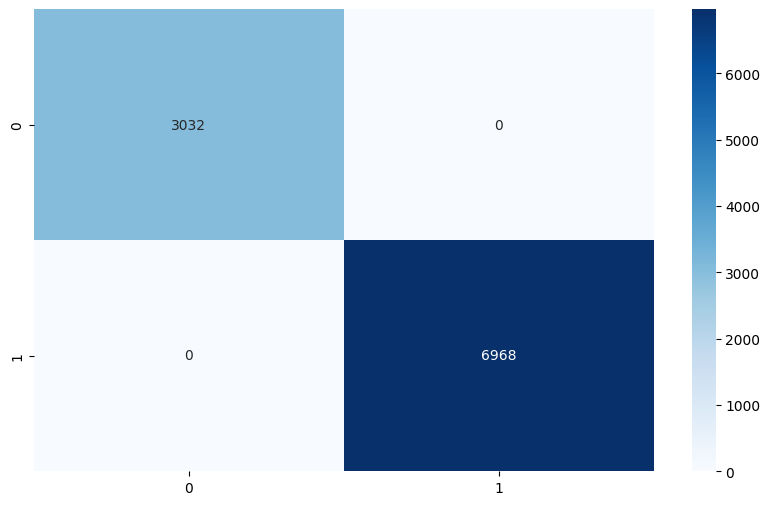

In [32]:
models= {"Logistic Regression":LogisticRegression(),
         "K-Nearest Neighbour": KNeighborsClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Support Vector Classifier": SVC(probability= True),
         "Naive Bayes": GaussianNB(),
         "Gradient Boosting": GradientBoostingClassifier()}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  acc= accuracy_score(y_test, y_pred)
  cm= confusion_matrix(y_test, y_pred)
  cr= classification_report(y_test, y_pred)
  print(name, acc, cr)
  plt.figure(figsize=(10,6))
  sns.heatmap(cm, annot= True, cmap= "Blues", fmt= "d")
  plt.show()